# Ensemble Learning

## Import Libraries:

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Data
The data here is taken form the Data Hackathon3.x - http://datahack.analyticsvidhya.com/contest/data-hackathon-3x

In [3]:
#Load data:
train = pd.read_csv('train_modified.csv')

In [5]:
train.shape

(20000, 51)

In [6]:
train.dtypes

Disbursed                          int64
Existing_EMI                     float64
ID                                object
Loan_Amount_Applied                int64
Loan_Tenure_Applied                int64
Monthly_Income                     int64
Var4                               int64
Var5                               int64
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
Device_Type_0                      int64
Device_Type_1                      int64
Filled_Form_0                      int64
Filled_Form_1                      int64
Gender_0                           int64
Gender_1                           int64
Var1_0                             int64
Var1_1                             int64
Var1_2                             int64
Var1_3                             int64
Var1_4          

In [8]:
train.Disbursed.value_counts()

0    19680
1      320
Name: Disbursed, dtype: int64

In [9]:
target='Disbursed'
IDcol = 'ID'

In [11]:
x_columns = [x for x in train.columns if x not in [target, IDcol]]
x_columns[:10]

['Existing_EMI',
 'Loan_Amount_Applied',
 'Loan_Tenure_Applied',
 'Monthly_Income',
 'Var4',
 'Var5',
 'Age',
 'EMI_Loan_Submitted_Missing',
 'Interest_Rate_Missing',
 'Loan_Amount_Submitted_Missing']

In [12]:
X = train[x_columns]
y = train['Disbursed']

# RandomForest Models

RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

There 2 types of parameters here:
1. Tree-specific parameters
  * min_samples_split
  * min_samples_leaf
  * max_depth
  * min_leaf_nodes
  * max_features
2. Bagging specific paramters
  * n_estimators
  * oob_score

## Baseline Model

In [14]:
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(X,y)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False)

In [16]:
rf0.oob_score_

0.98004999999999998

In [18]:
y_pred = rf0.predict_proba(X)[:,1] #Predict class probabilities for X.
print("AUC Score (Train): {:.4f}".format(roc_auc_score(y, y_pred)))

AUC Score (Train): 0.9998


In [19]:
print("AUC Score (Train): {:.4f}".format(roc_auc_score(y, y_pred)))

AUC Score (Train): 0.9998


In [20]:
rf0.feature_importances_

array([  1.24821929e-01,   9.32931276e-02,   7.61361638e-02,
         2.28716544e-01,   2.62701690e-02,   1.00406650e-01,
         1.80193761e-01,   3.39627912e-03,   1.57004954e-03,
         2.81439154e-03,   1.33196184e-03,   2.62308515e-03,
         2.56383655e-03,   1.32982315e-03,   4.95659835e-03,
         3.78274617e-03,   1.22153066e-02,   8.45888159e-03,
         1.71508989e-03,   3.85604060e-03,   8.29382995e-03,
         6.23401310e-03,   0.00000000e+00,   2.21176730e-03,
         6.58576924e-04,   1.67763535e-03,   6.54770503e-03,
         7.38852566e-04,   6.99840895e-03,   6.15109428e-03,
         2.16906090e-03,   2.70416217e-03,   9.94469550e-04,
         3.70782240e-03,   4.01243476e-06,   7.06420778e-04,
         3.09283913e-06,   1.03679420e-06,   7.76388501e-03,
         1.94071272e-03,   6.53311681e-05,   5.92533821e-03,
         2.54676157e-03,   1.04241899e-07,   2.09272343e-03,
         9.23456941e-04,   1.54106298e-02,   1.87163432e-02,
         1.43603182e-02]

In [21]:
pd.Series(rf0.feature_importances_, x_columns).sort_values(ascending=False).head(n=10)

Monthly_Income         0.228717
Age                    0.180194
Existing_EMI           0.124822
Var5                   0.100407
Loan_Amount_Applied    0.093293
Loan_Tenure_Applied    0.076136
Var4                   0.026270
Source_1               0.018716
Source_0               0.015411
Source_2               0.014360
dtype: float64

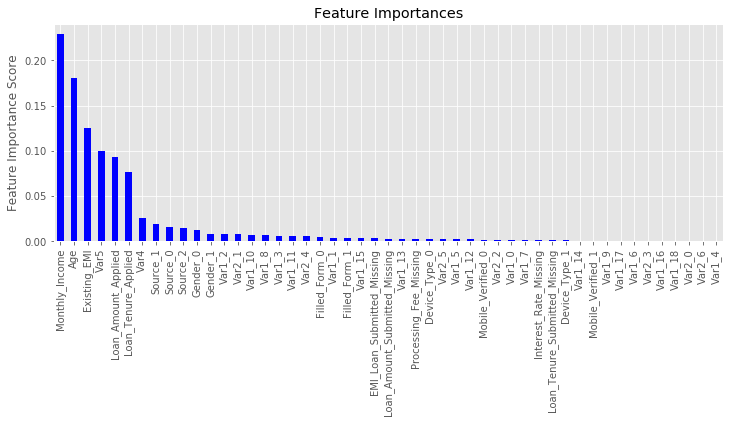

In [22]:
feat_imp = pd.Series(rf0.feature_importances_, x_columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances', color='blue')
plt.ylabel('Feature Importance Score')
plt.show()

## Tune n_estimators

得到最佳弱学习器的迭代次数:60

In [23]:
param_test1 = {'n_estimators':np.arange(10,71,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                        min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10),
                        param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.80681, std: 0.02236, params: {'n_estimators': 10},
  mean: 0.81600, std: 0.03275, params: {'n_estimators': 20},
  mean: 0.81818, std: 0.03136, params: {'n_estimators': 30},
  mean: 0.81838, std: 0.03118, params: {'n_estimators': 40},
  mean: 0.82034, std: 0.03001, params: {'n_estimators': 50},
  mean: 0.82113, std: 0.02966, params: {'n_estimators': 60},
  mean: 0.81992, std: 0.02836, params: {'n_estimators': 70}],
 {'n_estimators': 60},
 0.8211334476626017)

## Tune max_depth和min_samples_split

In [24]:
param_test2 = {'max_depth':np.arange(3,14,2), 'min_samples_split':np.arange(50,201,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60,
                        min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
                        param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.79379, std: 0.02347, params: {'max_depth': 3, 'min_samples_split': 50},
  mean: 0.79339, std: 0.02410, params: {'max_depth': 3, 'min_samples_split': 70},
  mean: 0.79350, std: 0.02462, params: {'max_depth': 3, 'min_samples_split': 90},
  mean: 0.79367, std: 0.02493, params: {'max_depth': 3, 'min_samples_split': 110},
  mean: 0.79387, std: 0.02521, params: {'max_depth': 3, 'min_samples_split': 130},
  mean: 0.79373, std: 0.02524, params: {'max_depth': 3, 'min_samples_split': 150},
  mean: 0.79378, std: 0.02532, params: {'max_depth': 3, 'min_samples_split': 170},
  mean: 0.79349, std: 0.02542, params: {'max_depth': 3, 'min_samples_split': 190},
  mean: 0.80960, std: 0.02602, params: {'max_depth': 5, 'min_samples_split': 50},
  mean: 0.80920, std: 0.02629, params: {'max_depth': 5, 'min_samples_split': 70},
  mean: 0.80888, std: 0.02522, params: {'max_depth': 5, 'min_samples_split': 90},
  mean: 0.80923, std: 0.02777, params: {'max_depth': 5, 'min_samples_split': 110},
  mean: 0.

## The second fit model

In [25]:
rf1 = RandomForestClassifier(n_estimators= 60, max_depth=13, min_samples_split=110,
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10)
rf1.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=110, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False)

In [26]:
rf1.oob_score_, rf0.oob_score_ # 袋外分数有一定的提高。也就是时候模型的泛化能力增强了

(0.98399999999999999, 0.98004999999999998)

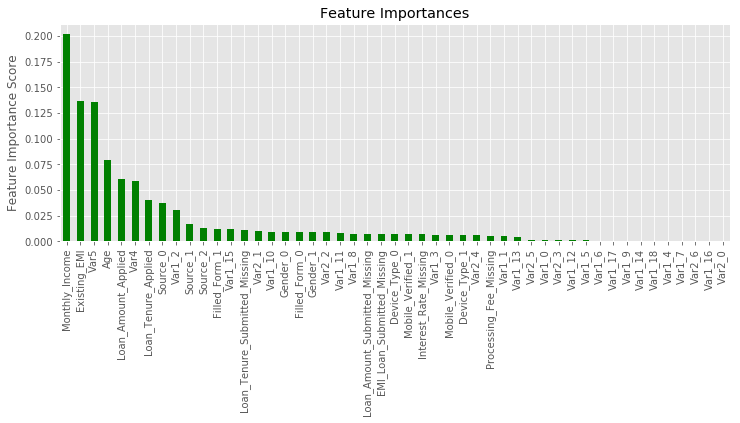

In [28]:
feat_imp1 = pd.Series(rf1.feature_importances_, x_columns).sort_values(ascending=False)
feat_imp1.plot(kind='bar', title='Feature Importances', color='green')
plt.ylabel('Feature Importance Score')
plt.show()

## Tune min_samples_split and min_samples_leaf

In [29]:
param_test3 = {'min_samples_split':np.arange(80,150,20), 'min_samples_leaf':np.arange(10,60,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, max_depth=13,
                        max_features='sqrt' ,oob_score=True, random_state=10),
                        param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
# If iid=True, the data is assumed to be identically distributed across the folds, and the loss minimized is the total loss per sample, and not the mean loss across the folds.
gsearch3.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'min_samples_split': array([ 80, 100, 120, 140]), 'min_samples_leaf': array([10, 20, 30, 40, 50])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [30]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.82093, std: 0.02287, params: {'min_samples_leaf': 10, 'min_samples_split': 80},
  mean: 0.81913, std: 0.02141, params: {'min_samples_leaf': 10, 'min_samples_split': 100},
  mean: 0.82048, std: 0.02328, params: {'min_samples_leaf': 10, 'min_samples_split': 120},
  mean: 0.81798, std: 0.02099, params: {'min_samples_leaf': 10, 'min_samples_split': 140},
  mean: 0.82094, std: 0.02535, params: {'min_samples_leaf': 20, 'min_samples_split': 80},
  mean: 0.82097, std: 0.02327, params: {'min_samples_leaf': 20, 'min_samples_split': 100},
  mean: 0.82487, std: 0.02110, params: {'min_samples_leaf': 20, 'min_samples_split': 120},
  mean: 0.82169, std: 0.02406, params: {'min_samples_leaf': 20, 'min_samples_split': 140},
  mean: 0.82352, std: 0.02271, params: {'min_samples_leaf': 30, 'min_samples_split': 80},
  mean: 0.82164, std: 0.02381, params: {'min_samples_leaf': 30, 'min_samples_split': 100},
  mean: 0.82070, std: 0.02528, params: {'min_samples_leaf': 30, 'min_samples_split': 120},
  

## Tune max_features

In [31]:
np.arange(3,11,2)

array([3, 5, 7, 9])

In [32]:
param_test4 = {'max_features':np.arange(3,11,2)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, max_depth=13, min_samples_split=120,
                                  min_samples_leaf=20 ,oob_score=True, random_state=10),
                                  param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=120, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'max_features': array([3, 5, 7, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [33]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.81981, std: 0.02586, params: {'max_features': 3},
  mean: 0.81639, std: 0.02533, params: {'max_features': 5},
  mean: 0.82487, std: 0.02110, params: {'max_features': 7},
  mean: 0.81704, std: 0.02209, params: {'max_features': 9}],
 {'max_features': 7},
 0.8248650279471544)

## Final model

In [34]:
rf2 = RandomForestClassifier(n_estimators= 60, max_depth=13, min_samples_split=120,
                                  min_samples_leaf=20,max_features=7 ,oob_score=True, random_state=10)
rf2.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features=7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=120, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=True, random_state=10,
            verbose=0, warm_start=False)

In [35]:
rf2.oob_score_, rf1.oob_score_, rf0.oob_score_
# 模型的袋外分数基本没有提高，主要原因是0.984已经是一个很高的袋外分数了，如果想进一步需要提高模型的泛化能力，我们需要更多的数据。

(0.98399999999999999, 0.98399999999999999, 0.98004999999999998)

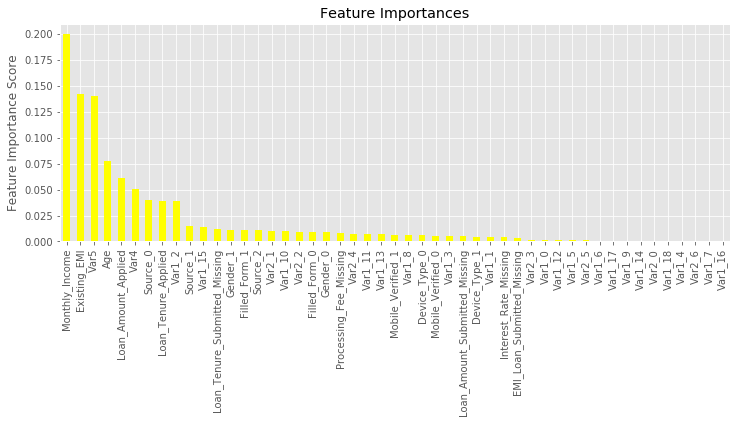

In [76]:
feat_imp2 = pd.Series(rf2.feature_importances_, x_columns).sort_values(ascending=False)
feat_imp2.plot(kind='bar', title='Feature Importances', color='yellow')
plt.ylabel('Feature Importance Score')
plt.show()

# GBM Models

GradientBoostingClassifier(loss=’deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’)

There 2 types of parameters here:
1. Tree-specific parameters
  * min_samples_split
  * min_samples_leaf
  * max_depth
  * min_leaf_nodes
  * max_features
  * loss function
2. Boosting specific paramters
  * n_estimators
  * learning_rate
  * subsample

## Approach for tackling the problem

1. Decide a relatively higher value for learning rate and tune the number of estimators requried for that.
2. Tune the tree specific parameters for that learning rate
3. Tune subsample
4. Lower learning rate as much as possible computationally and increase the number of estimators accordingly.

## Baseline Model
Since here the criteria is AUC, simply predicting the most prominent class would give an AUC of 0.5 always. Another way of getting a baseline model is to use the algorithm without tuning, i.e. with default parameters.

In [36]:
#Choose all predictors except target & IDcols
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False)

In [38]:
y_pred = gbm0.predict(X)
y_predprob = gbm0.predict_proba(X)[:,1]

In [42]:
accuracy_score(y.values, y_pred), roc_auc_score(y, y_predprob)

(0.98524999999999996, 0.90053091653963413)

In [41]:
y_predprob[:10]

array([ 0.00752626,  0.0270393 ,  0.00507962,  0.00607838,  0.03115941,
        0.04761133,  0.03702955,  0.00279068,  0.08159529,  0.00920809])

In [43]:
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Find the number of estimators for a high learning rate

We will use the following benchmarks for parameters:
1. min_samples_split = 500 : ~0.5-1% of total values. Since this is imbalanced class problem, we'll take small value
2. min_samples_leaf = 50 : Just using for preventing overfitting. will be tuned later.
3. max_depth = 8 : since high number of observations and predictors, choose relatively high value
4. max_features = 'sqrt' : general thumbrule to start with
5. subsample = 0.8 : typically used value (will be tuned later)

0.1 is assumed to be a good learning rate to start with. Let's try to find the optimum number of estimators requried for this.

In [46]:
#Choose all predictors except target & IDcols
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                       min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=20,
              min_samples_split=300, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'n_estimators': array([20, 30, 40, 50, 60, 70, 80])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [47]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.81285, std: 0.01967, params: {'n_estimators': 20},
  mean: 0.81438, std: 0.01947, params: {'n_estimators': 30},
  mean: 0.81451, std: 0.01933, params: {'n_estimators': 40},
  mean: 0.81618, std: 0.01848, params: {'n_estimators': 50},
  mean: 0.81779, std: 0.01736, params: {'n_estimators': 60},
  mean: 0.81533, std: 0.01900, params: {'n_estimators': 70},
  mean: 0.81322, std: 0.01860, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.8177893165650406)

So we got 60 as the optimal estimators for the 0.1 learning rate. Note that 60 is a reasonable value and can be used as it is. But it might not be the same in all cases. Other situations:
1. If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search
2. If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate

## Tune tree-specific parameters
Now, lets move onto tuning the tree parameters. We will do this in 2 stages:
1. Tune max_depth and num_samples_split
2. Tune min_samples_leaf
3. Tune max_features

In [48]:
#Grid seach on subsample and max_features
param_test2 = {'max_depth':np.arange(3,14,2), 'min_samples_split':np.arange(100,801,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, min_samples_leaf=20,
                        max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=20,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]), 'min_samples_split': array([100, 300, 500, 700])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [49]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.81199, std: 0.02073, params: {'max_depth': 3, 'min_samples_split': 100},
  mean: 0.81267, std: 0.01985, params: {'max_depth': 3, 'min_samples_split': 300},
  mean: 0.81238, std: 0.01937, params: {'max_depth': 3, 'min_samples_split': 500},
  mean: 0.80925, std: 0.02051, params: {'max_depth': 3, 'min_samples_split': 700},
  mean: 0.81846, std: 0.01843, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: 0.81630, std: 0.01810, params: {'max_depth': 5, 'min_samples_split': 300},
  mean: 0.81315, std: 0.01898, params: {'max_depth': 5, 'min_samples_split': 500},
  mean: 0.81262, std: 0.02090, params: {'max_depth': 5, 'min_samples_split': 700},
  mean: 0.81807, std: 0.02004, params: {'max_depth': 7, 'min_samples_split': 100},
  mean: 0.82137, std: 0.01733, params: {'max_depth': 7, 'min_samples_split': 300},
  mean: 0.81703, std: 0.01773, params: {'max_depth': 7, 'min_samples_split': 500},
  mean: 0.81383, std: 0.02327, params: {'max_depth': 7, 'min_samples_split': 700},
  me

Since we reached the maximum of min_sales_split, we should check higher values as well. Also, we can tune min_samples_leaf with it now as max_depth is fixed. One might argue that max depth might change for higher value but if you observe the output closely, a max_depth of 9 had a better model for most of cases.
So lets perform a grid search on them:

In [51]:
#Grid seach on subsample and max_features
param_test3 = {'min_samples_split':np.arange(800,1900,200), 'min_samples_leaf':np.arange(60,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=1,
       param_grid={'min_samples_split': array([ 800, 1000, 1200, 1400, 1600, 1800]), 'min_samples_leaf': array([ 60,  70,  80,  90, 100])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [52]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.81828, std: 0.02251, params: {'min_samples_leaf': 60, 'min_samples_split': 800},
  mean: 0.81731, std: 0.02344, params: {'min_samples_leaf': 60, 'min_samples_split': 1000},
  mean: 0.82220, std: 0.02250, params: {'min_samples_leaf': 60, 'min_samples_split': 1200},
  mean: 0.81447, std: 0.02125, params: {'min_samples_leaf': 60, 'min_samples_split': 1400},
  mean: 0.81495, std: 0.01626, params: {'min_samples_leaf': 60, 'min_samples_split': 1600},
  mean: 0.81528, std: 0.02140, params: {'min_samples_leaf': 60, 'min_samples_split': 1800},
  mean: 0.81590, std: 0.02517, params: {'min_samples_leaf': 70, 'min_samples_split': 800},
  mean: 0.81573, std: 0.02207, params: {'min_samples_leaf': 70, 'min_samples_split': 1000},
  mean: 0.82021, std: 0.02521, params: {'min_samples_leaf': 70, 'min_samples_split': 1200},
  mean: 0.81512, std: 0.01995, params: {'min_samples_leaf': 70, 'min_samples_split': 1400},
  mean: 0.81395, std: 0.02081, params: {'min_samples_leaf': 70, 'min_samples_split

## The second fit model

In [53]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_leaf =60, 
               min_samples_split =1200, max_features='sqrt', subsample=0.8, random_state=10)
gbm1.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=1200, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False)

In [54]:
y_pred1 = gbm1.predict(X)
y_predprob1 = gbm1.predict_proba(X)[:,1]
accuracy_score(y.values, y_pred1), roc_auc_score(y, y_predprob1)
# 对比我们最开始完全不调参的拟合效果，可见精确度稍有下降，主要原理是我们使用了0.8的子采样，20%的数据没有参与拟合。

(0.98399999999999999, 0.90809872014735771)

In [55]:
accuracy_score(y.values, y_pred), roc_auc_score(y, y_predprob)

(0.98524999999999996, 0.90053091653963413)

## Tune max_features

In [57]:
#Grid seach on subsample and max_features
param_test4 = {'max_features':np.arange(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=1200, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_features': array([ 7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [58]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.82220, std: 0.02250, params: {'max_features': 7},
  mean: 0.82241, std: 0.02421, params: {'max_features': 9},
  mean: 0.82108, std: 0.02302, params: {'max_features': 11},
  mean: 0.82064, std: 0.01900, params: {'max_features': 13},
  mean: 0.82198, std: 0.01514, params: {'max_features': 15},
  mean: 0.81355, std: 0.02053, params: {'max_features': 17},
  mean: 0.81877, std: 0.01863, params: {'max_features': 19}],
 {'max_features': 9},
 0.822412506351626)

## Step3- Tune Subsample and Lower Learning Rate

In [59]:
#Grid seach on subsample and max_features
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=9),
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=9, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=1200, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [60]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.81828, std: 0.02392, params: {'subsample': 0.6},
  mean: 0.82344, std: 0.02708, params: {'subsample': 0.7},
  mean: 0.81673, std: 0.02196, params: {'subsample': 0.75},
  mean: 0.82241, std: 0.02421, params: {'subsample': 0.8},
  mean: 0.82285, std: 0.02446, params: {'subsample': 0.85},
  mean: 0.81738, std: 0.02236, params: {'subsample': 0.9}],
 {'subsample': 0.7},
 0.8234378969766262)

## The third fit model
With all tuned lets try reducing the learning rate and proportionally increasing the number of estimators to get more robust results:

In [61]:
#Choose all predictors except target & IDcols
gbm2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=7, min_samples_split=1200, 
                                  min_samples_leaf=60, subsample=0.7, random_state=10, max_features=9)
gbm2.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=7,
              max_features=9, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=1200, min_weight_fraction_leaf=0.0,
              n_estimators=120, presort='auto', random_state=10,
              subsample=0.7, verbose=0, warm_start=False)

In [62]:
y_pred2 = gbm2.predict(X)
y_predprob2 = gbm2.predict_proba(X)[:,1]
accuracy_score(y.values, y_pred2), roc_auc_score(y, y_predprob2)

(0.98399999999999999, 0.90532448869410564)

In [63]:
accuracy_score(y.values, y_pred2), accuracy_score(y.values, y_pred1), accuracy_score(y.values, y_pred)

(0.98399999999999999, 0.98399999999999999, 0.98524999999999996)

In [64]:
roc_auc_score(y, y_predprob2), roc_auc_score(y, y_predprob1), roc_auc_score(y, y_predprob)

(0.90532448869410564, 0.90809872014735771, 0.90053091653963413)

AUC分数比起之前的版本稍有下降，这个原因是我们为了增加模型泛化能力，为防止过拟合而减半步长，最大迭代次数加倍，同时减小了子采样的比例，从而减少了训练集的拟合程度。

## The fourth model--Tune learning rate 0.01

In [65]:
gbm3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=7, min_samples_split=1200, 
                                         min_samples_leaf=60, subsample=0.7, random_state=10, max_features=9)
gbm3.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=7,
              max_features=9, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=1200, min_weight_fraction_leaf=0.0,
              n_estimators=600, presort='auto', random_state=10,
              subsample=0.7, verbose=0, warm_start=False)

In [66]:
y_pred3 = gbm3.predict(X)
y_predprob3 = gbm3.predict_proba(X)[:,1]
accuracy_score(y.values, y_pred3), roc_auc_score(y, y_predprob3)

(0.98399999999999999, 0.90858096735264238)

In [83]:
gbm3.score(X, y)

0.98399999999999999

In [67]:
accuracy_score(y.values, y_pred3), accuracy_score(y.values, y_pred2), accuracy_score(y.values, y_pred1), accuracy_score(y.values, y_pred)

(0.98399999999999999,
 0.98399999999999999,
 0.98399999999999999,
 0.98524999999999996)

In [68]:
roc_auc_score(y, y_predprob3), roc_auc_score(y, y_predprob2), roc_auc_score(y, y_predprob1), roc_auc_score(y, y_predprob)

(0.90858096735264238,
 0.90532448869410564,
 0.90809872014735771,
 0.90053091653963413)

## The fifth fit model--1/50th learning rate

In [69]:
#Choose all predictors except target & IDcols
gbm4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=7, min_samples_leaf =60, 
               min_samples_split =1200, max_features=9, subsample=0.7, random_state=10)
gbm4.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=7,
              max_features=9, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=1200, min_weight_fraction_leaf=0.0,
              n_estimators=1200, presort='auto', random_state=10,
              subsample=0.7, verbose=0, warm_start=False)

In [84]:
gbm4.score(X, y)

0.98399999999999999

In [70]:
y_pred4 = gbm4.predict(X)
y_predprob4 = gbm4.predict_proba(X)[:,1]
accuracy_score(y.values, y_pred4), roc_auc_score(y, y_predprob4)

(0.98399999999999999, 0.90823210429369927)

In [71]:
roc_auc_score(y, y_predprob4), roc_auc_score(y, y_predprob3), roc_auc_score(y, y_predprob2), roc_auc_score(y, y_predprob1), roc_auc_score(y, y_predprob)

(0.90823210429369927,
 0.90858096735264238,
 0.90532448869410564,
 0.90809872014735771,
 0.90053091653963413)

In [72]:
accuracy_score(y.values, y_pred4), accuracy_score(y.values, y_pred3), accuracy_score(y.values, y_pred2), accuracy_score(y.values, y_pred1), accuracy_score(y.values, y_pred)

(0.98399999999999999,
 0.98399999999999999,
 0.98399999999999999,
 0.98399999999999999,
 0.98524999999999996)

## Feature Importance

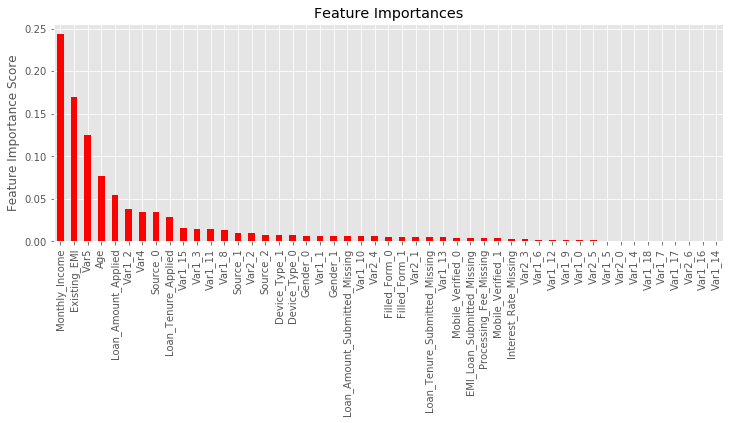

In [77]:
feat_imp3 = pd.Series(gbm3.feature_importances_, x_columns).sort_values(ascending=False)
feat_imp3.plot(kind='bar', title='Feature Importances', color='red')
plt.ylabel('Feature Importance Score')
plt.show()

# Write a function

In [ ]:
def GBMfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : {:.4f}".format(accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)))
    print("AUC Score (Train): {:.f}".format(roc_auc_score(dtrain['Disbursed'], dtrain_predprob)))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

# Adaboost

In [85]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier

In [86]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
# 讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

In [97]:
X.shape, y.shape

((900, 2), (900,))

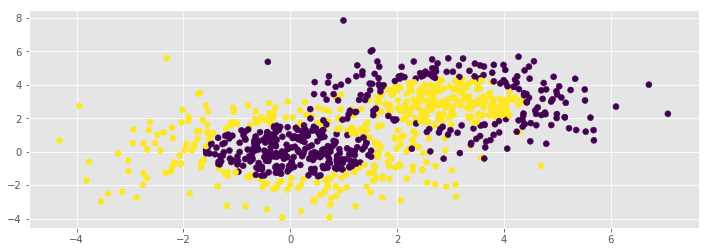

In [87]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [90]:
bdt = AdaBoostClassifier()
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [91]:
bdt.score(X,y)

0.87888888888888894

In [92]:
bdt1 = AdaBoostClassifier(DecisionTreeClassifier())
bdt1.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [93]:
bdt1.score(X,y)

1.0

In [95]:
bdt2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",n_estimators=200, learning_rate=0.8)
bdt2.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

In [96]:
bdt2.score(X, y)

0.91333333333333333

In [111]:
param_test1 = {'n_estimators':np.arange(20,300,10)}
gsearch1 = GridSearchCV(estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",n_estimators=200, learning_rate=0.8), 
                       param_grid = param_test1, scoring='roc_auc', iid=False, cv=10)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.95286, std: 0.03376, params: {'n_estimators': 20},
  mean: 0.95247, std: 0.03681, params: {'n_estimators': 30},
  mean: 0.95336, std: 0.03601, params: {'n_estimators': 40},
  mean: 0.95642, std: 0.03229, params: {'n_estimators': 50},
  mean: 0.95909, std: 0.02787, params: {'n_estimators': 60},
  mean: 0.95928, std: 0.02655, params: {'n_estimators': 70},
  mean: 0.95904, std: 0.02616, params: {'n_estimators': 80},
  mean: 0.96309, std: 0.02559, params: {'n_estimators': 90},
  mean: 0.96259, std: 0.02551, params: {'n_estimators': 100},
  mean: 0.96286, std: 0.02673, params: {'n_estimators': 110},
  mean: 0.96380, std: 0.02701, params: {'n_estimators': 120},
  mean: 0.96343, std: 0.02718, params: {'n_estimators': 130},
  mean: 0.96326, std: 0.02693, params: {'n_estimators': 140},
  mean: 0.96286, std: 0.02826, params: {'n_estimators': 150},
  mean: 0.96444, std: 0.02811, params: {'n_estimators': 160},
  mean: 0.96479, std: 0.02779, params: {'n_estimators': 170},
  mean: 0.96462,

In [110]:
bdt3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",n_estimators=90, learning_rate=0.8)
bdt3.fit(X,y)
bdt3.score(X,y)

0.89555555555555555